In [18]:
import pandas as pd
import networkx as nx
import pickle

In [19]:
path = "../../graphs/tx_graph/tx_transaction_graph_timestamp_1.pkl"

with open(path, "rb") as f:
    G = pickle.load(f)

In [20]:
G.number_of_nodes(), G.number_of_edges()

(7880, 9164)

In [21]:
for node in list(G.nodes(data=True))[:5]:
    print(node)

(230425980, {'Time step': 1.0, 'Local_feature_1': -0.1714692896288031, 'Local_feature_2': -0.1846675514329143, 'Local_feature_3': -1.2013688016765636, 'Local_feature_4': -0.1219695997591005, 'Local_feature_5': -0.0438745479173489, 'Local_feature_6': -0.1130020092847624, 'Local_feature_7': -0.0615837940730322, 'Local_feature_8': -0.1620967998165964, 'Local_feature_9': -0.1679330264522565, 'Local_feature_10': -0.0497069643940398, 'Local_feature_11': -0.16440217329951, 'Local_feature_12': -0.0287412858566647, 'Local_feature_13': -0.0353905526008135, 'Local_feature_14': -0.0429552992580282, 'Local_feature_15': -0.0132816148700588, 'Local_feature_16': -0.0571946336607915, 'Local_feature_17': -0.1696091501556076, 'Local_feature_18': -0.1711537070883345, 'Local_feature_19': -0.1744725474413385, 'Local_feature_20': -1.373657177393896, 'Local_feature_21': -1.37145982760274, 'Local_feature_22': -0.1397312019227955, 'Local_feature_23': -0.1489118870463073, 'Local_feature_24': -0.0801472696533522,

In [80]:
def find_khop_neighborhood(G, source_node, k=2):
    """Find nodes within k-hop neighborhood of source node.
    Returns a set of nodes"""
    
    nodes = nx.single_source_shortest_path_length(G, source_node, cutoff=k)
    
    return nodes
  
paths = []  
colors = ["b", "r", "g"]

clrs =  []
for i in range(3):

    source = list(G.nodes(data=False))[i]
        
    khop = find_khop_neighborhood(G, source, k=2)
    paths.extend(khop.keys())
    clrs.extend([colors[i%3]] * len(khop.keys()))

In [81]:
# subnodes = list(G.nodes())[:50]
# subnodes = list(khop.keys())
subnodes = paths
edges = [e for e in G.edges() if e[0] in subnodes and e[1] in subnodes]

In [82]:
subnodes

[230425980,
 5530458,
 232403360,
 5530458,
 232403360,
 232022460,
 232438397,
 232022462,
 92491280,
 232022463]

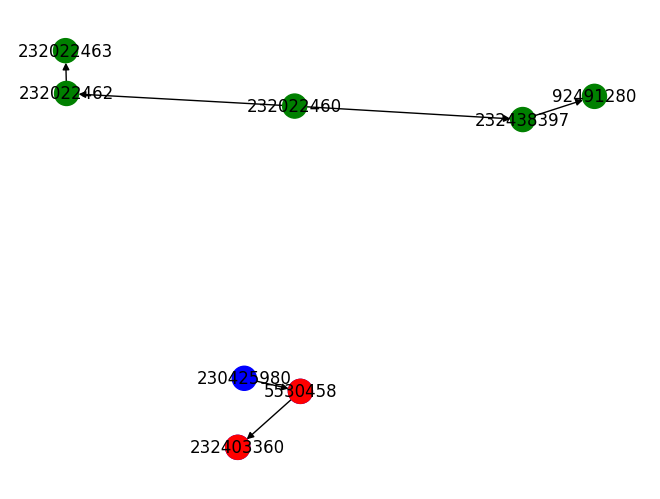

In [83]:
H = nx.subgraph(G, subnodes)
nx.draw(H, nodelist=subnodes, edgelist=edges, with_labels=True, node_color=clrs)